# **BipedalWalker - PPO**

The implementation of Proximal Policy Optimization with Continuous action space for BipedalWalker v3.



## Initialization

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt

In [ ]:
from sim.GymTrainer import GymTrainer
from framework.ProximalPolicyOptimization import ProximalPolicyOptimizationAgent

import torch
trainDevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Create the simulation environment
sim = GymTrainer(
    'BipedalWalker-v3', 
    evalDevice="cpu", 
    trainDevice=trainDevice, 
    render_mode='rgb_array', 
    envNum=1,
    hardcore=False,
    batchSize=8000,
    maxEpisode=6000,
    maxStep=100000,
    seed=555)

=============Initializing=============
Initializing Gym Environments of BipedalWalker-v3
init envs
set seeds 555


In [4]:
# Create the agent
agent = ProximalPolicyOptimizationAgent(
    actionNum=sim.actionSize(), 
    stateNum=sim.stateSize(), 
    gamma=0.99, 
    lamda=0.95,
    eps=0.2,
    rwShaper=lambda rwds: torch.clamp(rwds, min = -1.0),
    entropyBeta=0.0002,
    memorySize=8000,
    batchSize=2000,
    trainEpoch=70,
    policyLR=1e-4, 
    criticLR=1e-4,
    layerActor=[64] ,
    layerCritic=[64])

In [5]:
name, writer = sim.makeSummaryWriter(agent)

In [ ]:
# agent.load_state_dict(torch.load("/home/rtu/gym_plaground/PPO-pytorch/runs/BipedalWalker-v3-ProximalPolicyOptimizationAgent-20251118-082438/best_weight.pt"))

RuntimeError: Error(s) in loading state_dict for ProximalPolicyOptimizationAgent:
	size mismatch for policy.net.0.weight: copying a param with shape torch.Size([128, 24]) from checkpoint, the shape in current model is torch.Size([64, 24]).
	size mismatch for policy.net.0.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for policy.net.2.weight: copying a param with shape torch.Size([8, 128]) from checkpoint, the shape in current model is torch.Size([8, 64]).
	size mismatch for critic.net.0.weight: copying a param with shape torch.Size([128, 24]) from checkpoint, the shape in current model is torch.Size([64, 24]).
	size mismatch for critic.net.0.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for critic.net.2.weight: copying a param with shape torch.Size([1, 128]) from checkpoint, the shape in current model is torch.Size([1, 64]).

## Training

In [7]:
sim.train(agent, writer)

=============Start Training=============
Save best weight with total reward:-4277.74560546875
Step:8000 	               Episode:40 	               meanLoss: 3.20 	               LossCritic: 2.20 	               AvgAdv: -1.24 	               AvgRew: -0.08 	               FinRew: -0.92
Step:16000 	               Episode:92 	               meanLoss: 2.77 	               LossCritic: 2.10 	               AvgAdv: -2.05 	               AvgRew: -0.08 	               FinRew: -0.95
Save best weight with total reward:-2845.815673828125
Step:24000 	               Episode:119 	               meanLoss: 1.34 	               LossCritic: 0.93 	               AvgAdv: -2.47 	               AvgRew: -0.06 	               FinRew: -0.89
Step:32000 	               Episode:159 	               meanLoss: 1.58 	               LossCritic: 1.26 	               AvgAdv: -2.88 	               AvgRew: -0.07 	               FinRew: -0.91
Step:40000 	               Episode:193 	               meanLoss: 1.43 	            

# Testing

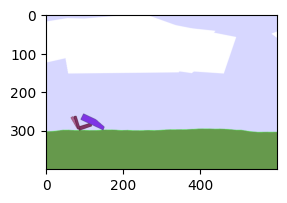

Average Total Reward:-59.094669342041016 	 Max Total Reward:-59.094669342041016 	 Min Total Reward:-59.094669342041016


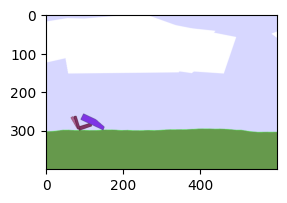

In [8]:
sim.test(
    agent = agent, 
    episode = 1, 
    maxStep = 10000, 
    renderStep = 10,
    writer = writer)

# 2-Stage Training

In [6]:
# Create the simulation environment
sim = GymTrainer(
    'BipedalWalker-v3', 
    evalDevice="cpu", 
    trainDevice=trainDevice, 
    render_mode='rgb_array', 
    envNum=1,
    hardcore=True,
    batchSize=8000,
    maxEpisode=50000,
    maxStep=100000,
    seed=123)

=============Initializing=============
Initializing Gym Environments of BipedalWalker-v3
init envs
set seeds 123


In [7]:
# use from saved weight
pretrain_state_dict = torch.load("/home/rtu/gym_plaground/RLPlayground/runs/BipedalWalker-v3-hardcore-ProximalPolicyOptimizationAgent-20251120-223220/latest_weight.pt")

# use the weight from stage 1
# pretrain_state_dict = agent.state_dict()

In [9]:
# Create the agent
agent = ProximalPolicyOptimizationAgent(
    actionNum=sim.actionSize(), 
    stateNum=sim.stateSize(), 
    gamma=0.99, 
    lamda=0.95,
    eps=0.2,
    rwShaper = lambda rwds: rwds.apply_(lambda x: -0.001 if x<=-100.0 else x),
    entropyBeta=-0.0001,
    memorySize=8000,
    batchSize=2000,
    trainEpoch=70,
    policyLR=1e-4, 
    criticLR=1e-4,
    layerActor=[64] ,
    layerCritic=[64])
agent.load_state_dict(pretrain_state_dict)

<All keys matched successfully>

In [10]:
name, writer = sim.makeSummaryWriter(agent)

In [11]:
sim.train(agent, writer)

=============Start Training=============
Save best weight with total reward:-1225.041015625
Step:8000 	               Episode:32 	               meanLoss: 2.72 	               LossCritic: 3.54 	               AvgAdv: 15.00 	               AvgRew: 0.25 	               FinRew: -0.00
Step:16000 	               Episode:65 	               meanLoss: 1.34 	               LossCritic: 2.05 	               AvgAdv: 15.82 	               AvgRew: 0.25 	               FinRew: -0.00
Save best weight with total reward:-821.4401245117188
Step:24000 	               Episode:90 	               meanLoss: 1.41 	               LossCritic: 1.65 	               AvgAdv: 14.25 	               AvgRew: 0.20 	               FinRew: -0.00
Step:32000 	               Episode:119 	               meanLoss: 1.76 	               LossCritic: 2.15 	               AvgAdv: 16.87 	               AvgRew: 0.24 	               FinRew: -0.00
Step:40000 	               Episode:143 	               meanLoss: 1.74 	               Loss

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x75e2923a2180>>
Traceback (most recent call last):
  File "/home/rtu/miniconda3/envs/rlpg/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Step:1808000 	               Episode:5699 	               meanLoss: 1.60 	               LossCritic: 1.66 	               AvgAdv: 13.63 	               AvgRew: 0.20 	               FinRew: -0.00


KeyboardInterrupt: 

KeyboardInterrupt: 

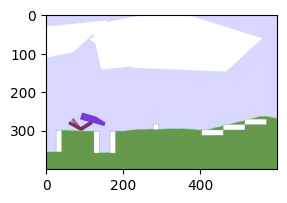

In [12]:
sim.test(
    agent = agent, 
    episode = 40, 
    maxStep = 10000, 
    renderStep = 5,
    writer = None)